In [45]:
import numpy as np
import matplotlib.pyplot as plt

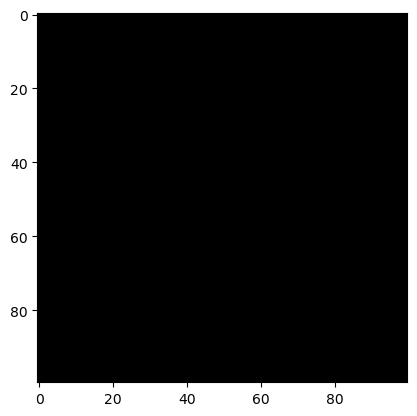

In [46]:

img = np.zeros(shape=(100,100))



plt.imshow(img, cmap="gray")


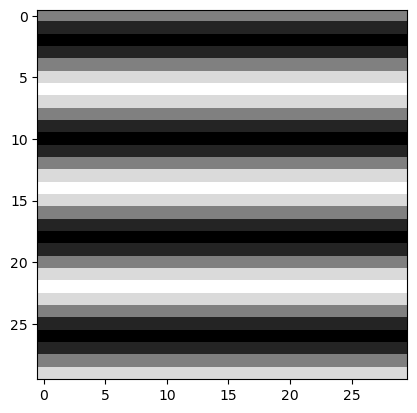

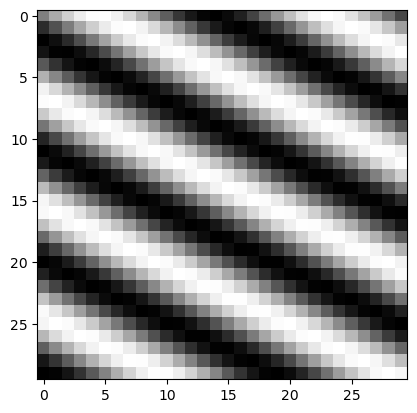

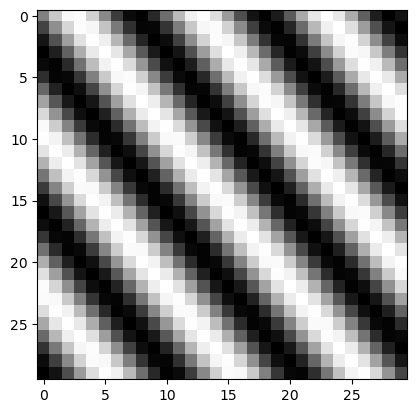

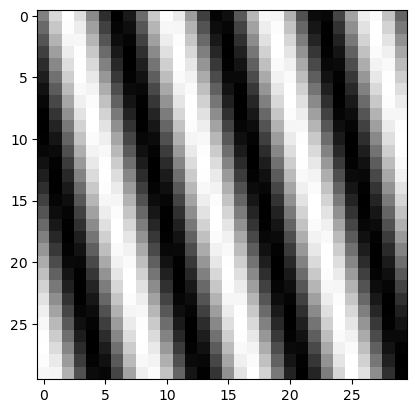

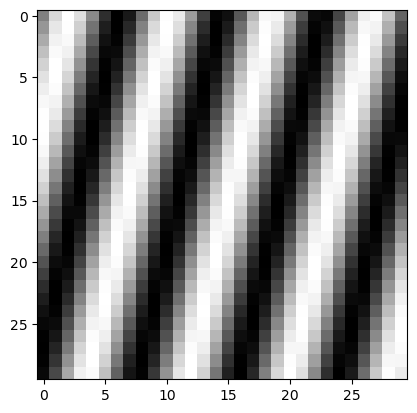

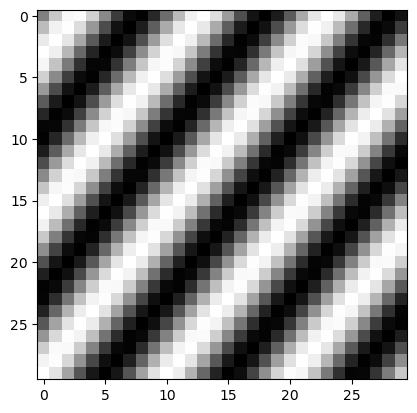

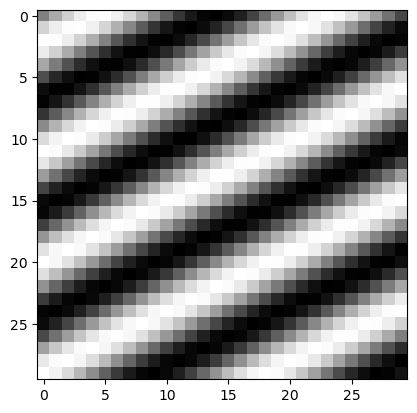

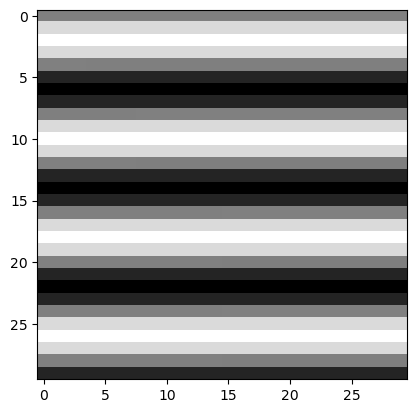

In [47]:
# code from https://www.baskrahmer.nl/blog/generating-gratings-in-python-using-numpy 
# Copyright Bas Krahmer

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal


def create_grating(sf, ori, phase, wave, imsize):
    """
    :param sf: spatial frequency (in pixels)
    :param ori: wave orientation (in degrees, [0-360])
    :param phase: wave phase (in degrees, [0-360])
    :param wave: type of wave ('sqr' or 'sin')
    :param imsize: image size (integer)
    :return: numpy array of shape (imsize, imsize)
    """
    # Get x and y coordinates
    x, y = np.meshgrid(np.arange(imsize), np.arange(imsize))

    # Get the appropriate gradient
    gradient = np.sin(ori * math.pi / 180) * x - np.cos(ori * math.pi / 180) * y

    # Plug gradient into wave function
    if wave == 'sin':
        grating = np.sin((2 * math.pi * gradient) / sf + (phase * math.pi) / 180)
    elif wave == 'sqr':
        grating = signal.square((2 * math.pi * gradient) / sf + (phase * math.pi) / 180)
    else:
        raise NotImplementedError

    return grating


orientations = np.linspace(start=0, stop=180, num=8 )
data_set = []
for ori in orientations:
    img = create_grating(sf=8, ori=ori, phase=0, wave='sin', imsize=30, )
    data_set.append(img.flatten())
    plt.imshow(img, cmap="gray")
    plt.show()

In [48]:
data_set = np.array(data_set)
data_set.shape

data_set = np.tile(data_set, reps=(50,1))
data_set.shape

(400, 900)

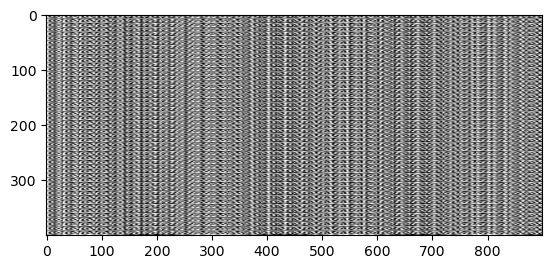

In [49]:
plt.imshow(data_set, cmap="gray")

In [50]:

np.savetxt("gratings.csv", data_set, delimiter=",")

In [51]:
test = np.loadtxt("gratings.csv", delimiter=",")
test

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.07106781e-01,  7.07106781e-01,  7.07106781e-01],
       [ 0.00000000e+00,  3.34214320e-01,  6.29992057e-01, ...,
         9.47792737e-01,  9.99868515e-01,  9.36953619e-01],
       [ 0.00000000e+00,  5.76181518e-01,  9.41851384e-01, ...,
         6.91247495e-01,  1.48612432e-01, -4.48319147e-01],
       ...,
       [ 0.00000000e+00,  5.76181518e-01,  9.41851384e-01, ...,
        -5.93707639e-01, -2.16079494e-02,  5.58386345e-01],
       [ 0.00000000e+00,  3.34214320e-01,  6.29992057e-01, ...,
        -9.92403211e-01, -9.76454840e-01, -8.48208505e-01],
       [ 0.00000000e+00,  9.61835347e-17,  1.92367069e-16, ...,
        -7.07106781e-01, -7.07106781e-01, -7.07106781e-01]])